### loading the data

In [1]:
from datasets import load_dataset

imdb_dataset = load_dataset("imdb")

/home/koushik/miniconda3/envs/soc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### calculating the review lengths

In [2]:
from transformers import BertTokenizer
import matplotlib.pyplot as plt

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Compute lengths for the training split
def get_token_lengths(example):
    tokens = tokenizer(
        example['text'],
        truncation=False,
        add_special_tokens=True
    )
    return {"length": len(tokens["input_ids"])}

# Apply to training set (sample to speed up if needed)
train_lengths = imdb_dataset['train'].map(get_token_lengths, batched=False)


Map: 100%|██████████| 25000/25000 [01:34<00:00, 265.04 examples/s]


### plotting the review lengths

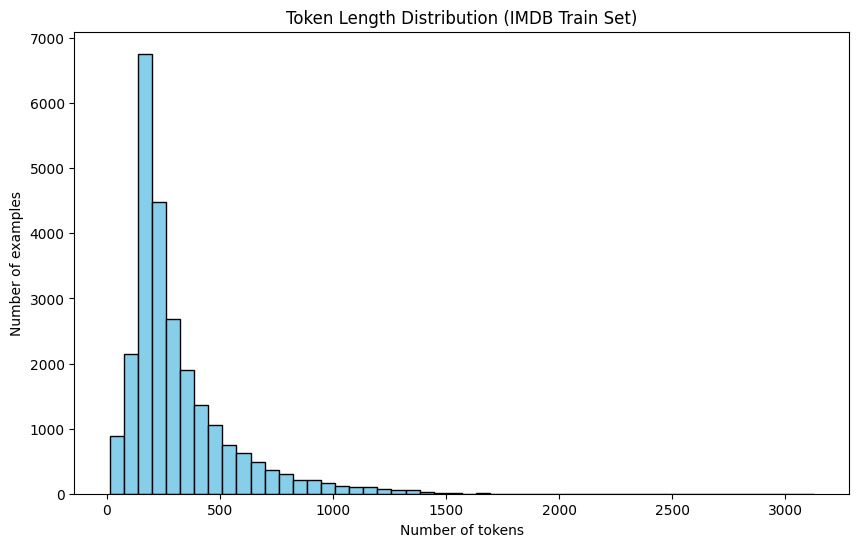

In [3]:
lengths = train_lengths['length']

plt.figure(figsize=(10,6))
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Token Length Distribution (IMDB Train Set)')
plt.xlabel('Number of tokens')
plt.ylabel('Number of examples')
plt.show()
